In [1]:
import numpy as np
import scipy.io as spio
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as hierarchy
from sklearn.cluster import AgglomerativeClustering
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import Birch


In [2]:
at = pd.read_csv("data/AutoInsurance.csv")

print(at.describe())

at.info()

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

In [3]:
#we have to dro the unnecessary columns
at.drop(at.columns[[0,1,2,3,6,8,10,11,19,22,23]],axis=1 , inplace=True)
at

,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount
0,Basic,Bachelor,Employed,56274,69,32,5,0,1,Corporate Auto,Corporate L3,Agent,384.811147
1,Extended,Bachelor,Unemployed,0,94,13,42,0,8,Personal Auto,Personal L3,Agent,1131.464935
2,Premium,Bachelor,Employed,48767,108,18,38,0,2,Personal Auto,Personal L3,Agent,566.472247
3,Basic,Bachelor,Unemployed,0,106,18,65,0,7,Corporate Auto,Corporate L2,Call Center,529.881344
4,Basic,Bachelor,Employed,43836,73,12,44,0,1,Personal Auto,Personal L1,Agent,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,71941,73,18,89,0,2,Personal Auto,Personal L1,Web,198.234764
9130,Extended,College,Employed,21604,79,14,28,0,1,Corporate Auto,Corporate L3,Branch,379.200000
9131,Extended,Bachelor,Unemployed,0,85,9,37,3,2,Corporate Auto,Corporate L2,Branch,790.784983
9132,Extended,College,Employed,21941,96,34,3,0,3,Personal Auto,Personal L2,Branch,691.200000


In [4]:
#now we have standardize the numerical columns.
def std_fnc(i):
    x=(i-i.min())/(i.std())
    return(x)

std_at = std_fnc(at.iloc[ : , [3,8,12]])
std_at.describe()

,Income,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000
mean,1.239549,0.822603,1.493940
std,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.936865
50%,1.115524,0.418378,1.321330
75%,2.051356,1.255135,1.884391
max,3.291024,3.347026,9.959173


In [5]:
#Now we have to create dummy variable for categorical columns.

at_dummy = pd.get_dummies(at)

at_new = pd.concat([std_at , at_dummy], axis = 1)

at_new.describe()

,Income,Number of Policies,Total Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.239549,0.822603,1.493940,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,...,0.135757,0.232319,0.375082,0.007226,0.017955,0.016203,0.380666,0.281038,0.193234,0.145062
std,1.000000,1.000000,1.000000,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,...,0.342549,0.422334,0.484171,0.084701,0.132795,0.126263,0.485577,0.449531,0.394857,0.352183
min,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.936865,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.115524,0.418378,1.321330,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.051356,1.255135,1.884391,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,3.291024,3.347026,9.959173,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
def plot_dendrogram(model, **kwargs):
    # 创建链接矩阵，然后绘制树状图
    # 创建每个节点的样本计数
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # 叶子节点
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # 绘制相应的树状图
    dendrogram(linkage_matrix, **kwargs)

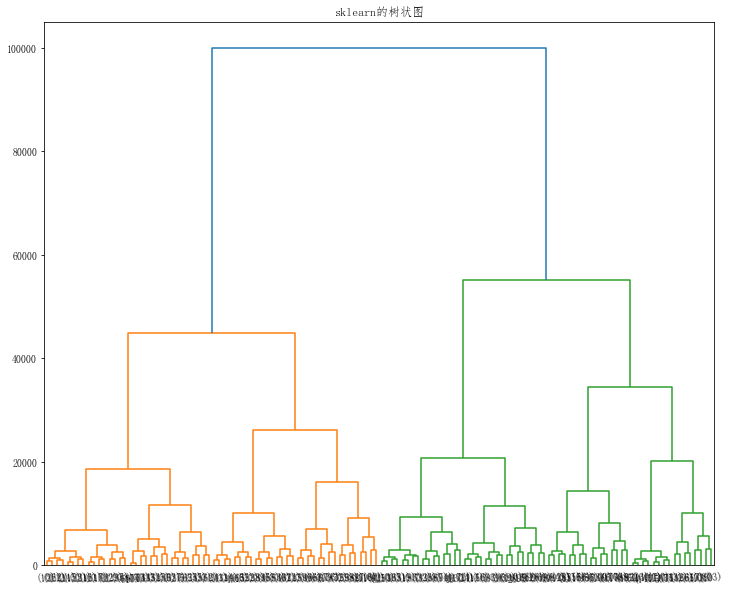

In [7]:
# 看看普通的效果
plt.figure(figsize=(12, 10))
model = AgglomerativeClustering(linkage='complete',distance_threshold=0, n_clusters=None)
model = model.fit(at_new)
plt.title('sklearn的树状图')
# 绘制树状图的前三个级别
plot_dendrogram(model, truncate_mode='level',p=6,leaf_rotation = 5,  
                     leaf_font_size = 10)
plt.show()

In [8]:
cd_comp = AgglomerativeClustering(n_clusters = 5 , linkage = "complete" ,affinity = "euclidean" ).fit(at_new)
cd_comp.labels_

array([0, 1, 2, ..., 1, 4, 1], dtype=int64)

Text(0.5, 1.0, 'sklearn的散点图')

<Figure size 1152x720 with 0 Axes>

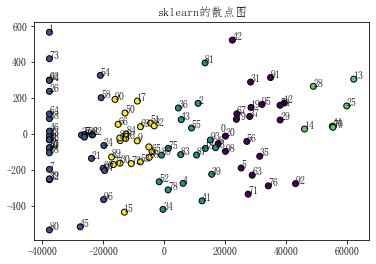

In [9]:
#根据两个最大的主成分进行绘图
from sklearn import decomposition as skldec #用于主成分分析降维的包
plt.figure(figsize=(16, 10))
pca = skldec.PCA(n_components =2)    #选择方差95%的占比
pca.fit(at_new)   #主城分析时每一行是一个输入数据
result = pca.transform(at_new)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[1:100, 0], result[1:100, 1], c=cd_comp.labels_[1:100], edgecolor='k') #绘制两个主成分组成坐标的散点图
for i in range(result[1:100,0].size):
    plt.text(result[i,0],result[i,1],at_new.index[i])     #在每个点边上绘制数据名称
plt.title('sklearn的散点图')

In [10]:
cd_comp2 = Birch(n_clusters =5 ).fit(at_new)
cd_comp2.labels_


array([3, 2, 3, ..., 2, 4, 2], dtype=int64)

Text(0.5, 1.0, 'Birch的散点图')

<Figure size 1152x720 with 0 Axes>

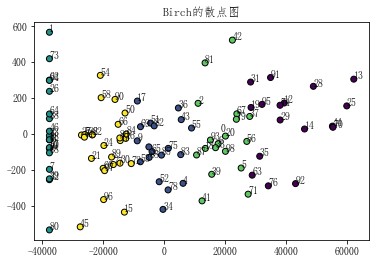

In [11]:
#根据两个最大的主成分进行绘图
plt.figure(figsize=(16, 10))
pca = skldec.PCA(n_components =2)    #选择方差95%的占比
pca.fit(at_new)   #主城分析时每一行是一个输入数据
result = pca.transform(at_new)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[1:100, 0], result[1:100, 1], c=cd_comp2.labels_[1:100], edgecolor='k') #绘制两个主成分组成坐标的散点图
for i in range(result[1:100,0].size):
    plt.text(result[i,0],result[i,1],at_new.index[i])     #在每个点边上绘制数据名称
plt.title('Birch的散点图')